In [1]:
#Python
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

concrete = pd.read_csv("data/concrete+slump+test/slump_test.data")
concrete.rename(columns={'No':'id', 
                         'Compressive Strength (28-day)(Mpa)':'Comp_Strength',
                         'FLOW(cm)': 'Flow'},
                inplace=True)
lm_flow_water = ols('Flow ~ Water', data=concrete).fit()
print(lm_flow_water.summary())

                            OLS Regression Results                            
Dep. Variable:                   Flow   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     67.18
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           8.10e-13
Time:                        20:20:14   Log-Likelihood:                -414.60
No. Observations:                 103   AIC:                             833.2
Df Residuals:                     101   BIC:                             838.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -58.7276     13.286     -4.420      0.0

In [2]:
#Python
bike2 = pd.read_csv("data/bike2.csv")
bike2_sub = bike2[bike2.workingday == "no"]

lm_reg_casual = ols('registered ~ casual', bike2_sub).fit()
anova_tab = sm.stats.anova_lm(lm_reg_casual,)
anova_tab

,df,sum_sq,mean_sq,F,PR(>F)
casual,1.0,2.376546e+08,2.376546e+08,369.251728,1.183368e-49
Residual,229.0,1.473870e+08,6.436112e+05,NaN,NaN


In [4]:
new_df.head()

,const,Water
0,1.0,160.000000
1,1.0,168.888889
2,1.0,177.777778
3,1.0,186.666667
4,1.0,195.555556


In [5]:
#| fig-align: center
# Python
new_df = sm.add_constant(pd.DataFrame({'Water' : np.linspace(160,240, 10)}))

predictions_out = lm_flow_water.get_prediction(new_df)

In [9]:
predictions_out.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.187934,2.832998,23.568028,34.807839,1.470835,56.905032
1,34.072127,2.326245,29.457483,38.686772,6.541251,61.603004
2,38.956321,1.872736,35.241317,42.671324,11.561879,66.350763
3,43.840515,1.520869,40.823520,46.857509,16.531973,71.149057
4,48.724708,1.352452,46.041807,51.407610,21.451055,75.998362
5,53.608902,1.433665,50.764897,56.452907,26.318930,80.898874
6,58.493096,1.729694,55.061847,61.924344,31.135689,85.850502
7,63.377289,2.153711,59.104905,67.649673,35.901710,90.852869
8,68.261483,2.644860,63.014792,73.508174,40.617641,95.905324
9,73.145676,3.172109,66.853065,79.438288,45.284392,101.006961


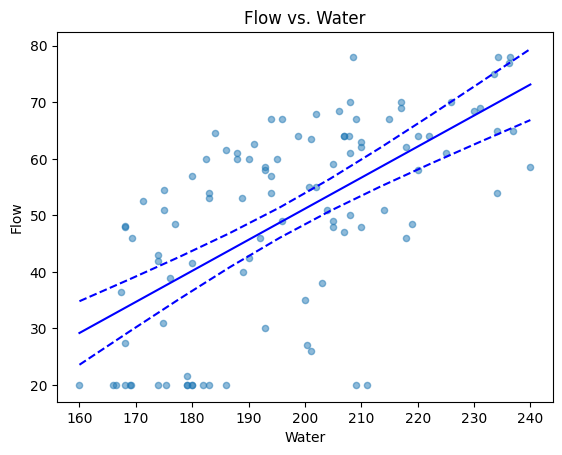

In [10]:
ax = concrete.plot(x='Water', y='Flow', kind='scatter', alpha=0.5 )
ax.set_title('Flow vs. Water');
ax.plot(new_df.Water, predictions_out.conf_int()[:, 0].reshape(-1), 
        color='blue', linestyle='dashed');
ax.plot(new_df.Water, predictions_out.conf_int()[:, 1].reshape(-1), 
        color='blue', linestyle='dashed');
ax.plot(new_df.Water, predictions_out.predicted, color='blue');

In [11]:
# Python
lm_flow_water_slag = ols('Flow ~ Water + Slag', data=concrete).fit()
print(lm_flow_water_slag.summary())

                            OLS Regression Results                            
Dep. Variable:                   Flow   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     49.17
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           1.35e-15
Time:                        20:21:53   Log-Likelihood:                -405.59
No. Observations:                 103   AIC:                             817.2
Df Residuals:                     100   BIC:                             825.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -50.2666     12.387     -4.058      0.0

In [12]:
# Python
lm_reg_casual2 = ols('registered ~ casual + workingday', bike2).fit()
print(lm_reg_casual2.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     378.7
Date:                Thu, 03 Apr 2025   Prob (F-statistic):          1.81e-113
Time:                        20:21:54   Log-Likelihood:                -6150.8
No. Observations:                 731   AIC:                         1.231e+04
Df Residuals:                     728   BIC:                         1.232e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           605.2254    118.79

In [13]:
# Python
lm_reg_casual3 = ols('registered ~ casual * workingday', bike2).fit()
print(lm_reg_casual3.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     377.5
Date:                Thu, 03 Apr 2025   Prob (F-statistic):          9.38e-148
Time:                        20:21:56   Log-Likelihood:                -6068.3
No. Observations:                 731   AIC:                         1.214e+04
Df Residuals:                     727   BIC:                         1.216e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

<Axes: >

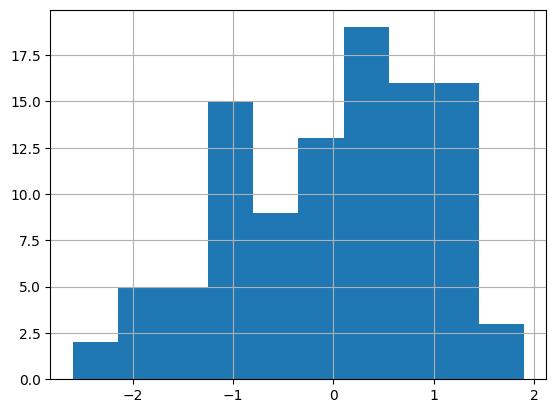

In [14]:
#| fig-align: center
# Python
r_s = pd.Series(lm_flow_water_slag.resid_pearson)
r_s.hist()

In [15]:
from statsmodels.stats.outliers_influence import OLSInfluence

In [17]:
inf_measures = OLSInfluence(lm_flow_water)

In [25]:
inf_measures.summary_frame().sort_values(by='dfb_Water')

,dfb_Intercept,dfb_Water,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
7,0.225111,-0.237660,0.034394,-1.100419,0.053752,-0.262274,-1.101581,-0.262551
13,0.205470,-0.218716,0.030924,-1.183665,0.042277,-0.248692,-1.186045,-0.249192
68,0.163866,-0.193393,0.054441,-2.739367,0.014302,-0.329971,-2.833049,-0.341256
84,0.175148,-0.163123,0.021216,1.266468,0.025773,0.205992,1.270310,0.206617
40,0.131552,-0.159964,0.046738,-2.656806,0.013070,-0.305738,-2.741141,-0.315443
...,...,...,...,...,...,...,...,...
93,-0.152697,0.144012,0.014707,-0.927951,0.033031,-0.171505,-0.927307,-0.171386
94,-0.153443,0.144599,0.014937,-0.943997,0.032436,-0.172840,-0.943483,-0.172746
6,-0.155789,0.146309,0.015788,-1.008123,0.030134,-0.177698,-1.008205,-0.177713
98,-0.156664,0.146823,0.016219,-1.044156,0.028893,-0.180105,-1.044628,-0.180186
